In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, Sampler
import numpy as np
import cv2 as cv
import torchlayers as tl
import os

edge_train_sets  : 26757
train_sets       : 26757
edge_test_sets   : 6690
test_sets        : 6690
51
K7


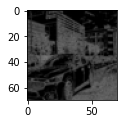

tensor([[0.0078, 0.0039, 0.0902,  ..., 0.0039, 0.0118, 0.0235],
        [0.0000, 0.0078, 0.0941,  ..., 0.0431, 0.0039, 0.0118],
        [0.0000, 0.0039, 0.1059,  ..., 0.0039, 0.0274, 0.0510],
        ...,
        [0.0431, 0.0588, 0.0902,  ..., 0.3568, 0.3686, 0.3882],
        [0.0314, 0.0078, 0.0000,  ..., 0.3725, 0.3882, 0.3647],
        [0.1843, 0.1686, 0.1412,  ..., 0.3843, 0.3372, 0.3882]])
프라이드 해치백


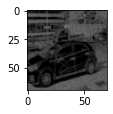

tensor([[0.0627, 0.0784, 0.0667,  ..., 0.3372, 0.3490, 0.3725],
        [0.0353, 0.1098, 0.1020,  ..., 0.3725, 0.3372, 0.3686],
        [0.1059, 0.1137, 0.1294,  ..., 0.3490, 0.3882, 0.3725],
        ...,
        [0.3451, 0.3411, 0.3764,  ..., 0.3647, 0.3843, 0.3882],
        [0.3255, 0.3372, 0.3647,  ..., 0.3725, 0.3725, 0.3843],
        [0.3764, 0.3372, 0.3529,  ..., 0.3333, 0.3607, 0.4078]])
포르테


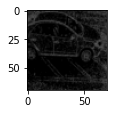

tensor([[0.1804, 0.1372, 0.1765,  ..., 0.1647, 0.1921, 0.1255],
        [0.1804, 0.1882, 0.1608,  ..., 0.2588, 0.2117, 0.2039],
        [0.2196, 0.1921, 0.1882,  ..., 0.1608, 0.1843, 0.2510],
        ...,
        [0.1137, 0.0392, 0.0941,  ..., 0.2196, 0.1098, 0.1725],
        [0.0745, 0.1216, 0.1176,  ..., 0.1725, 0.1804, 0.1765],
        [0.0706, 0.0471, 0.0863,  ..., 0.1843, 0.1529, 0.2157]])
스포티지 R


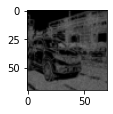

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0980, 0.1333, 0.0863],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.1882, 0.1961],
        [0.0000, 0.0000, 0.0000,  ..., 0.2510, 0.2470, 0.2706],
        ...,
        [0.3568, 0.3215, 0.1765,  ..., 0.3451, 0.3843, 0.3451],
        [0.3529, 0.3333, 0.3255,  ..., 0.3490, 0.3686, 0.3843],
        [0.3529, 0.3647, 0.3686,  ..., 0.3647, 0.3686, 0.3176]])


In [4]:
trans = transforms.Compose([
    transforms.Resize((120, 120)), 
    transforms.ToTensor(), 
    transforms.CenterCrop(70), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
trans_gray = transforms.Compose([transforms.Resize((120, 120)), transforms.ToTensor(), transforms.Grayscale(3), transforms.CenterCrop(70)
# , transforms.Normalize((0.5,), (0.5,))
])


datas = torchvision.datasets.ImageFolder(root = './data/kcar/darks', transform = trans)
train_size = int(len(datas) * 0.8)
test_size = len(datas) - train_size
train_sets, test_sets = torch.utils.data.random_split(datas, [train_size, test_size])

edge_datas = torchvision.datasets.ImageFolder(root = './data/kcar_edge/darks', transform = trans_gray)
edge_train_size = int(len(edge_datas) * 0.8)
edge_test_size = len(edge_datas) - edge_train_size
edge_train_sets, edge_test_sets = torch.utils.data.random_split(edge_datas, [edge_train_size, edge_test_size])

# edge_train_sets = torchvision.datasets.ImageFolder(root = './data/kcar_edge/lights', transform = trans_gray)
# edge_test_sets = torchvision.datasets.ImageFolder(root = './data/kcar_edge/darks', transform = trans_gray)
# train_sets = torchvision.datasets.ImageFolder(root = './data/kcar/lights', transform = trans)
# test_sets = torchvision.datasets.ImageFolder(root = './data/kcar/darks', transform = trans)
labels = datas.classes
print("edge_train_sets  :", len(edge_train_sets))
print("train_sets       :", len(train_sets))
print("edge_test_sets   :", len(edge_test_sets))
print("test_sets        :", len(test_sets))
# print(test_sets)
# print(edge_test_sets)

print(len(labels))
for i in range(4):
    img, label = edge_test_sets[i+100]
    print(labels[label])
    plt.subplot(241 + i)
    plt.imshow(np.clip(img.permute(1,2,0),0,1))
    plt.tight_layout()
    plt.show()
# for i in img[0]:
    # print(max(i))
    print(img[0])
    # save_image(img, str(i)+'_.jpg')


In [5]:
# DataLoader 정의 - data 길이 달라지면 random_t_list 수정하기!
import random
random_train_list = list(range(1, len(train_sets)))
random.shuffle(random_train_list)
random_test_list = list(range(1, len(test_sets)))
random.shuffle(random_test_list)

train_loader = DataLoader(train_sets, batch_size = 32, num_workers = 2, sampler = random_train_list)
edge_train_loader = DataLoader(edge_train_sets, batch_size = 32, num_workers = 2, sampler = random_train_list)
test_loader = DataLoader(test_sets, batch_size = 32, sampler = random_test_list)
edge_test_loader = DataLoader(edge_test_sets, batch_size = 32, sampler = random_test_list)

print(len(train_loader))

837


In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')
print(torch.cuda.is_available())
torch.cuda.empty_cache()

cuda:0 is available
True


스포티지


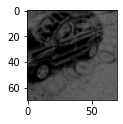

SM5


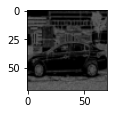

SM3


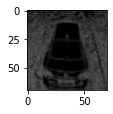

포르테


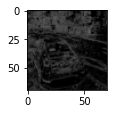

In [16]:
for i in range(4):
    img, label = edge_test_sets[i+600]
    print(labels[label])
    plt.subplot(241 + i)
    plt.imshow(np.clip(img.permute(1,2,0),0,1))
    plt.tight_layout()
    plt.show()

In [7]:
def accuracy(output, target, topk=(1,)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)
 
        _, pred = output.topk(maxk, 1, True, True) #(52, 32)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred)) # (5,32)
 
        res = []
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [8]:
class MyEnsemble(nn.Module):
    def __init__(self, modelA, modelB):
        super(MyEnsemble, self).__init__()
        self.modelA = modelA
        self.modelB = modelB
        # self.maxPool = nn.MaxPool1d(3, stride=2)
        self.fc1 = nn.Linear(1000, 51)
        self.fc2 = nn.Linear(1000, 51)
        self.fc3 = nn.Linear(102, 51)
        
    def forward(self, x1, x2):
        x1 = self.modelA(x1)
        # x1 = self.maxPool(x1)
        x1 = self.fc1(x1)

        x2 = self.modelB(x2)
        # x2 = self.maxPool(x2)
        x2 = self.fc2(x2)

        x = torch.cat((x1, x2), dim=1)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):  
        size = x.size()[1:] 
        num_features = 1 
        for s in size: 
            num_features *= s 
        return num_features

resnet101 = torch.load('resnet_whole_img_90%.pt')
resnet101 = resnet101.cuda()

resnet101_edge = torchvision.models.resnet101(pretrained=False)
resnet101_edge = resnet101_edge.cuda()

# vgg_model = torchvision.models.vgg16(pretrained=False)
# vgg_model = vgg_model.cuda()
# sqnet = torchvision.models.sqnet(pretrained=True)
# sqnet = torch.load('sqnet_org(1)31(2)75.pt')
# sqnet.cuda()

model = MyEnsemble(resnet101, resnet101_edge)
model = model.cuda()
print("model created!")
#모델 저장
# torch.save(model, 'ensemble(1)90(2)100.pt')
# model = torch.load('ensemble(1)90(2)100.pt')
# model.cuda()

model created!


In [17]:
#MyEnsemble 모델 학습 dark version
print(len(train_loader))
print(len(test_loader))

criterion = torch.nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.01)
# scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[3,6,8], gamma=0.1)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# hyper-parameters
num_epochs = 10
num_batches = 32

model.train()
trn_loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    trn_loss = 0.0
    total = 0
    correct = 0
    for i, (data, edge_data) in enumerate(zip(train_loader, edge_train_loader)):
        x, label = data
        x2, label2 = edge_data

        x = x.cuda()
        label = label.cuda()
        x2 = x2.cuda()
        # grad init
        optimizer.zero_grad()
        # forward propagation
        model_output = model(x, x2)               
        _, predicted = torch.max(model_output.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()
        # calculate loss
        loss = criterion(model_output, label)
        # back propagation 
        loss.backward()
        # weight update
        optimizer.step()
        
        # trn_loss summary
        trn_loss += loss.item()
        
        # 학습과정 출력
        if (i+1) % 100 == 1: # every 100 mini-batches
            model.eval()
            with torch.no_grad(): # very very very very important!!!
                val_loss = 0.0
                val_total = 0
                val_correct = 0
                for j, (val, edge_val) in enumerate(zip(test_loader, edge_test_loader)):
                    val_x, val_label = val
                    val_x2, val_label2 = edge_val
                    val_x = val_x.cuda()
                    val_x2 = val_x2.cuda()
                    val_label =val_label.cuda()

                    val_output = model(val_x, val_x2)
                    _, predicted = torch.max(val_output.data, 1)
                    val_total += val_label.size(0)
                    val_correct += (predicted == val_label).sum().item()
                    v_loss = criterion(val_output, val_label)
                    val_loss += v_loss
                    if epoch < 8:
                        break
                print("----------------testing data: "+ str(j * len(test_loader)))
                acc1, acc5 = accuracy(model_output, label, topk=(1, 5))
                print("train acc1 : {}, acc5 : {}".format(acc1[0], acc5[0])) 
                print('Accuracy of the network on the train images: %f %%' % (100 * correct / total))

                acc1, acc5 = accuracy(val_output, val_label, topk=(1, 5))
                print("test acc1 : {}, acc5 : {}".format(acc1[0], acc5[0]))
                print('Accuracy of the network on the test images: %f %%' % (100 * val_correct / val_total))
                       
            print("epoch: {}/{} | step: {}/{} | trn loss: {:.4f} | val loss: {:.4f}".format(
                epoch+1, num_epochs, i+1, len(train_loader), trn_loss / len(train_loader), val_loss / len(test_loader)
            ))
                    
            
            trn_loss_list.append(trn_loss/len(train_loader))
            val_loss_list.append(val_loss/len(test_loader))
            trn_loss = 0.0
            model.train()
        
        # del (memory issue)
        # del lossadw
        del model_output
    # scheduler.step()
#plotting the loss chart 

837
210
----------------testing data: 0
train acc1 : 78.125, acc5 : 100.0
Accuracy of the network on the train images: 78 %
test acc1 : 84.375, acc5 : 96.875
Accuracy of the network on the test images: 84 %
epoch: 1/10 | step: 1/837 | trn loss: 0.0007 | val loss: 0.0028
----------------testing data: 0
train acc1 : 84.375, acc5 : 100.0
Accuracy of the network on the train images: 83 %
test acc1 : 87.5, acc5 : 96.875
Accuracy of the network on the test images: 87 %
epoch: 1/10 | step: 101/837 | trn loss: 0.0614 | val loss: 0.0026
----------------testing data: 0
train acc1 : 84.375, acc5 : 100.0
Accuracy of the network on the train images: 85 %
test acc1 : 87.5, acc5 : 96.875
Accuracy of the network on the test images: 87 %
epoch: 1/10 | step: 201/837 | trn loss: 0.0434 | val loss: 0.0027
----------------testing data: 0
train acc1 : 90.625, acc5 : 100.0
Accuracy of the network on the train images: 87 %
test acc1 : 90.625, acc5 : 96.875
Accuracy of the network on the test images: 90 %
epoc

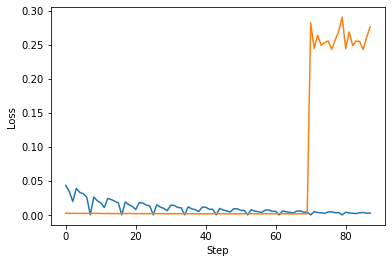

In [18]:

# plt.plot([x in x.cpu() from trn_loss_list])
val = []
for l in val_loss_list[2:]:
    val.append(l.cpu())
plt.plot(trn_loss_list[2:])
plt.plot(val)
plt.xlabel("Step")
plt.ylabel("Loss")
plt.show()

In [15]:
torch.save(model, 'resnet_parallel_93%.pt')

In [14]:
#MyEnsemble 모델 학습 dark version
print(len(train_loader))
print(len(test_loader))
criterion = nn.CrossEntropyLoss()
# backpropagation method
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# hyper-parameters
num_epochs = 10
num_batches = 32

model.train()
trn_loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    trn_loss = 0.0
    for i, (data, edge_data) in enumerate(zip(train_loader, edge_train_loader)):
        x, label = data
        x2, label2 = edge_data

        x = x.cuda()
        label = label.cuda()
        x2 = x2.cuda()
        # grad init
        optimizer.zero_grad()
        # forward propagation
        model_output = model(x, x2)
        # calculate loss
        loss = criterion(model_output, label)
        # back propagation 
        loss.backward()
        # weight update
        optimizer.step()
        
        # trn_loss summary
        trn_loss += loss.item()
        
        # 학습과정 출력
        if (i+1) % 100 == 1: # every 100 mini-batches
            model.eval()
            with torch.no_grad(): # very very very very important!!!
                val_loss = 0.0
                for j, (val, edge_val) in enumerate(zip(test_loader, edge_test_loader)):
                    val_x, val_label = val
                    val_x2, val_label2 = edge_val
                    val_x = val_x.cuda()
                    val_x2 = val_x2.cuda()
                    val_label =val_label.cuda()
                    val_output = model(val_x, val_x2)
                    v_loss = criterion(val_output, val_label)
                    val_loss += v_loss
                    if j > 50 * epoch:
                        print("testing data: "+ str(j * len(test_loader)))
                        break
                       
            print("trn loss: {:.4f} | val loss: {:.4f}".format(
                trn_loss / 100, val_loss / len(test_loader)
            ))
            acc1, acc5 = accuracy(model_output, label, topk=(1, 5))
            print("acc1 : {}, acc5 : {}".format(acc1[0], acc5[0]))
                    
            
            trn_loss_list.append(trn_loss/100)
            val_loss_list.append(val_loss/len(test_loader))
            trn_loss = 0.0
            model.train()
        
        # del (memory issue)
        del loss
        del model_output

213
54
testing data: 54
trn loss: 0.0007 | val loss: 0.0138
acc1 : 96.875, acc5 : 100.0
testing data: 54
trn loss: 0.1050 | val loss: 0.0197
acc1 : 100.0, acc5 : 100.0
testing data: 54
trn loss: 0.0958 | val loss: 0.0152
acc1 : 93.75, acc5 : 100.0
testing data: 2754
trn loss: 0.0003 | val loss: 0.4240
acc1 : 100.0, acc5 : 100.0


KeyboardInterrupt: 

In [19]:
# MyEnsemble 테스트
model.eval()
correct = 0
total = 0
class_correct = np.zeros(51)
class_total = np.zeros(51)
count = 0
print(len(test_loader))
print(len(labels))
with torch.no_grad():
    for index, ((images, targets), (edge_images, edge_target)) in enumerate(zip(test_loader, edge_test_loader)):
        images = images.cuda()
        edge_images = edge_images.cuda()
        targets = targets.cuda()

        outputs = model(images, edge_images)
        _, predicted = torch.max(outputs.data, 1)
        acc1, acc5 = accuracy(outputs, targets, topk=(1, 5))
        print("acc1 : {}, acc5 : {}".format(acc1[0], acc5[0]))
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        c = (predicted == targets).squeeze()
        count += 1
        for i in range(32):
            target = targets[i]
            class_correct[target] += c[i].item()
            class_total[target] += 1
        if count > len(test_loader)/10:
            break
            
for i in range(51):
    print('Accuract of %5s : %2d %%' %(
        labels[i], 100 * class_correct[i] / class_total[i]))
        
print('Accuracy of the network on the test images: %f %%' % (
      100 * correct / total))

210
51
acc1 : 93.75, acc5 : 96.875
acc1 : 90.625, acc5 : 100.0
acc1 : 93.75, acc5 : 96.875
acc1 : 96.875, acc5 : 100.0
acc1 : 96.875, acc5 : 100.0
acc1 : 96.875, acc5 : 100.0
acc1 : 87.5, acc5 : 100.0
acc1 : 84.375, acc5 : 96.875
acc1 : 93.75, acc5 : 100.0
acc1 : 93.75, acc5 : 96.875
acc1 : 96.875, acc5 : 100.0
acc1 : 96.875, acc5 : 96.875
acc1 : 90.625, acc5 : 100.0
acc1 : 100.0, acc5 : 100.0
acc1 : 96.875, acc5 : 100.0
acc1 : 93.75, acc5 : 100.0
acc1 : 100.0, acc5 : 100.0
acc1 : 87.5, acc5 : 100.0
acc1 : 93.75, acc5 : 100.0
acc1 : 90.625, acc5 : 100.0
acc1 : 96.875, acc5 : 100.0
acc1 : 100.0, acc5 : 100.0
Accuract of G4 렉스턴 : 86 %
Accuract of    K3 : 85 %
Accuract of    K5 : 95 %
Accuract of    K7 : 84 %
Accuract of    K9 : 100 %
Accuract of   QM3 : 100 %
Accuract of   QM6 : 92 %
Accuract of   SM3 : 96 %
Accuract of   SM5 : 100 %
Accuract of SM520 : 100 %
Accuract of   SM6 : 100 %
Accuract of   SM7 : 100 %
Accuract of 넥스트스파크 : 100 %
Accuract of 니로 하이브리드 : 85 %
Accuract of  더뉴레이 : 90 

In [79]:
#MyEnsemble 모델 학습
import torch.optim as optim
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(sqnet.parameters(), lr=0.01, betas=(0.9, 0.99), eps=1e-08, weight_decay=0, amsgrad=False)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[2,4,6,8], gamma=0.1)

model.train()
print(len(train_loader))
for epoch in range(10):
    for index, ((data, target), (edge_data, edge_target)) in enumerate(zip(train_loader, edge_train_loader)):
        data, target = data.cuda(), target.cuda()
        edge_data, edge_target = edge_data.cuda(), target.cuda()

        output = model(data, edge_data)
        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if index % 50 == 0:
            acc1, acc5 = accuracy(outputs, targets, topk=(1, 5))
            print("acc1 : {}, acc5 : {}".format(acc1[0], acc5[0]))
            print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))
    
    scheduler.step()
    print("-----")



780


RuntimeError: mat1 dim 1 must match mat2 dim 0

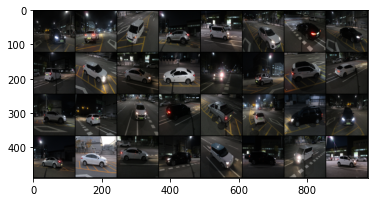

GroundTruth:   카니발 하이리무진        스토닉         레이     스포티지 R


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same

In [24]:
def imshow(img):
    # img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labs = dataiter.next()
edge_dataiter = iter(edge_test_loader)
edge_images, labs = edge_dataiter.next()

# 이미지 출력하기
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%10s' % labels[labs[j]] for j in range(4)))

outputs = model(images, edge_images)
_, predicted = torch.max(outputs, 1)
print('Predicted : ', ' '.join('%10s' % labels[predicted[j]] for j in range(4)))

In [ ]:
PATH = './cnn_ensemble.pth'
torch.save(model.state_dict(), PATH)
# model = model()
# model.load_state_dict(torch.load(PATH))

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for ((images, labels), (edge_images, edge_target)) in zip(test_loader, edge_test_loader):
        images = images.cuda()
        edge_images = edge_images.cuda()
        labels = labels.cuda()
        outputs = model(images, edge_images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the test images: %d %%' % (
      100 * correct / total))

Accuracy of the network on the test images: 3 %


In [12]:
class_correct = list(0. for i in range(51))
class_total = list(0. for i in range(51))
classes = labels
count = 0
with torch.no_grad():
    for ((images, labels), (edge_images, edge_target)) in zip(test_loader, edge_test_loader):
    # for data in test_loader:
        images = images.cuda()
        edge_images = edge_images.cuda()
        labels = labels.cuda()
        outputs = model(images, edge_images)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        print(labels)
        c = (predicted == labels).squeeze()
        count += 1
        for i in range(32):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        if count > 200:
            break
            
for i in range(51):
    print('Accuract of %5s : %2d %%' %(
        classes[i], 100 * class_correct[i] / class_total[i]))

tensor([25, 25,  3, 25,  3, 25, 25, 25, 25, 25, 25,  3,  2, 25,  3, 25,  2,  3,
        25, 25,  2, 25, 25, 33, 25,  2, 25,  2,  2,  3, 25, 25],
       device='cuda:0')
tensor([48, 18, 15,  2, 24, 23, 36, 38, 47, 44, 35, 46, 49,  7,  7, 24,  2, 21,
         4,  7,  7,  2, 18, 13, 42,  7, 18,  7, 44, 49, 15, 40],
       device='cuda:0')
tensor([25,  2,  3, 25, 25,  3, 25, 25,  2, 25, 25, 25,  2,  3, 25,  2,  2,  2,
         2,  2, 25, 25, 25, 25, 25, 25, 25, 25,  3, 25, 25,  3],
       device='cuda:0')
tensor([12, 25, 33,  8, 11,  1, 11, 48, 45, 36, 33, 50,  3, 20, 26, 17,  3, 24,
        33, 10, 33,  3,  1, 23, 48, 18, 41, 15, 44, 11, 23, 50],
       device='cuda:0')
tensor([ 2, 25, 25,  3, 25,  3,  3, 25, 25, 25, 25,  2, 25, 25,  3, 25, 25,  3,
        25, 25, 25, 25, 25,  3, 25, 25,  3, 25, 25,  2,  3, 25],
       device='cuda:0')
tensor([23, 24,  2, 41,  5, 18, 10, 37, 41, 31,  7,  4, 15,  0, 25, 10, 41, 10,
        33, 34,  4,  8, 33, 49, 22,  8, 10, 28, 44, 18,  6, 43],
       dev

IndexError: index 32 is out of bounds for dimension 0 with size 32

In [ ]:
model.eval()  # test
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data, target = data.cuda(), target.cuda()
    output = one_way_model(data)
    test_loss += one_way_criterion(output, target).item() # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    print("pred : "+str(pred)+"view as : "+str(target.view_as(pred)))
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))